100%|██████████| 5/5 [00:01<00:00,  3.07it/s]


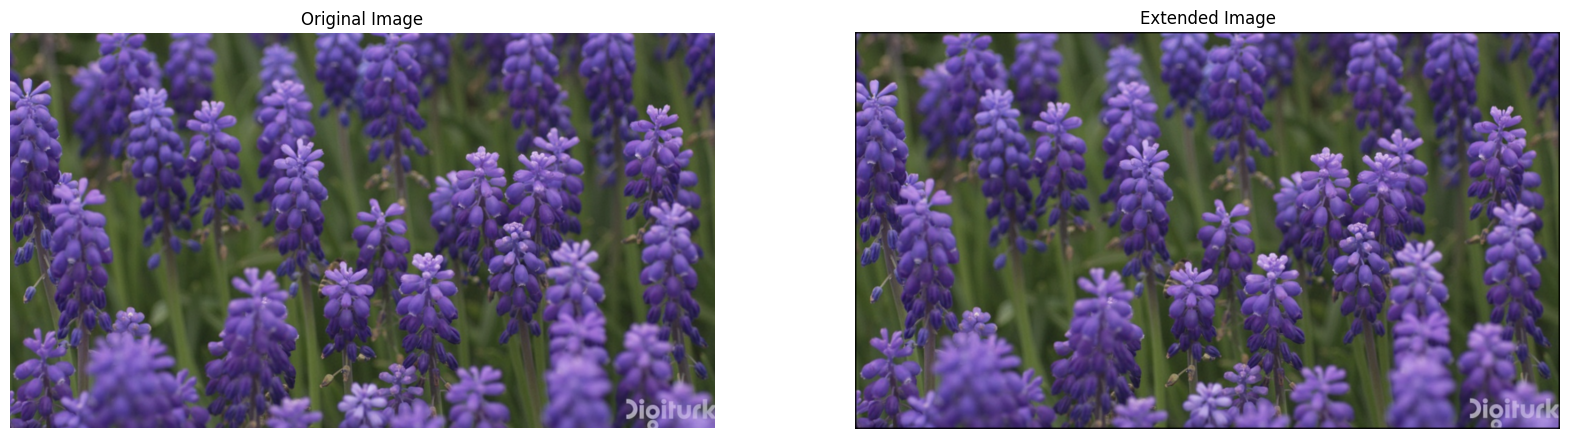

扩展后的图像已保存为 'extended_test.png'


In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


def extend_image(image, border_size=5):
    H, W, C = image.shape
    extended_image = np.zeros((H + 2 * border_size, W + 2 * border_size, C), dtype=np.uint8)
    Mask = np.zeros((H + 2 * border_size, W + 2 * border_size), dtype=np.uint8)
    Mask[border_size:H + border_size, border_size:W + border_size]=1
    extended_image[border_size:H + border_size, border_size:W + border_size] = image
    extended_image[border_size-1,:,:]=extended_image[border_size,:,:]
    for _ in tqdm(range(border_size)):
        for j in range(0,border_size):
            filled_image=extended_image
            for i in range(W):
                if(border_size-j-1>0):
                    block_image=filled_image[border_size-j-2:border_size-j+1,border_size+i-1:border_size+i+2,:]
                else:
                    block_image=filled_image[border_size-j-1:border_size-j+1,border_size+i-1:border_size+i+2,:]
                extended_image[border_size - 1 - j, border_size + i, :] = np.mean(block_image,  axis=(0,1)).astype(np.uint8)
        #bottom
        for j in range(0,border_size):
            filled_image=extended_image
            for i in range(W):
                if(border_size+H+j>=border_size+H+border_size-1):
                    block_image=filled_image[border_size+H+j-1:border_size+H+border_size,border_size+i-1:border_size+i+2,:]
                else:
                    block_image=filled_image[border_size+H+j-1:border_size+H+j+2,border_size+i-1:border_size+i+2,:]
                extended_image[border_size+H+j, border_size + i, :] = np.mean(block_image,  axis=(0,1)).astype(np.uint8)
        #left
        for i in range(border_size):
            filled_image=extended_image
            for j in range(0,H):
                if(border_size-i-1>0):
                    block_image=filled_image[border_size+j-1:border_size+j+2,border_size-i-2:border_size-i+1,:]
                else:
                    block_image=filled_image[border_size+j-1:border_size+j+2,border_size-i-1:border_size-i+1,:]
                extended_image[border_size+j, border_size-i-1, :] = np.mean(block_image,  axis=(0,1)).astype(np.uint8)
        #right
        for i in range(border_size):
            filled_image=extended_image
            for j in range(0,H):
                if(border_size+W+i>=border_size+W+border_size-1):
                    block_image=filled_image[border_size+j-1:border_size+j+2,border_size+W+i-1:border_size+W+border_size,:]
                else:
                    block_image=filled_image[border_size+j-1:border_size+j+2,border_size+W+i-1:border_size+W+i+2,:]
                extended_image[border_size+j, border_size+W+i, :] = np.mean(block_image,  axis=(0,1)).astype(np.uint8)
    for i in range(border_size):
        for j in range(border_size):
            x = border_size-j-1
            y = border_size-i-1
            if x==0 and y==0:
                alpha_x=0.5
                alpha_y=0.5
            else:
                alpha_x=x/(x+y)
                alpha_y=y/(x+y)
            extended_image[i, j] = (1-alpha_x) * extended_image[i, border_size] + (1-alpha_y) * extended_image[border_size, j]
            extended_image[i,  W + 2*border_size -1-j] = (1-alpha_x) * extended_image[i,  W +border_size-1] + (1-alpha_y) * extended_image[border_size, W + 2*border_size -1-j]
            extended_image[H + 2*border_size-1-i,  j] = (1-alpha_x) * extended_image[H + 2*border_size -1-i,  border_size] + (1-alpha_y) * extended_image[H+border_size-1, j]
            extended_image[H + 2*border_size-1-i,  W + 2*border_size -1-j] = (1-alpha_x) * extended_image[H + 2*border_size -1-i,  W+border_size-1] + (1-alpha_y) * extended_image[H+border_size-1, W + 2*border_size -1-j]
    return extended_image

# 读取图片
image = cv2.imread('test.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 调用extend_image函数进行扩展
extended_image = extend_image(image_rgb, border_size=5)

# 使用matplotlib显示原始图像和扩展图像
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(extended_image)
plt.title('Extended Image')
plt.axis('off')

plt.show()

# 保存扩展后的图像
extended_image_bgr = cv2.cvtColor(extended_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('extended_test.png', extended_image_bgr)
print("扩展后的图像已保存为 'extended_test.png'")